In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
file_path = '/content/drive/MyDrive/dataset/waterquality_1.csv'

# Load your dataset
dataset = pd.read_csv('/content/drive/MyDrive/dataset/waterquality_1.csv')


In [7]:
# Assuming the last column is your target variable (y_train)
y_train = dataset.iloc[:, -1]

# Assuming the rest of the columns are your features (X_train)
X_train = dataset.iloc[:, :-1]

In [8]:
water = pd.read_csv('/content/drive/MyDrive/dataset/waterquality_1.csv')
water.head()
water.describe

<bound method NDFrame.describe of       Station               Station Name    Year  Overall WQI     WQI FC  \
0      16A070    Skokomish R nr Potlatch  1996.0    87.000000  91.000000   
1      16A070    Skokomish R nr Potlatch  1997.0    86.000000  78.000000   
2      16A070    Skokomish R nr Potlatch  1998.0    75.000000  90.000000   
3      16A070    Skokomish R nr Potlatch  1999.0    87.000000  88.000000   
4      16A070    Skokomish R nr Potlatch  2000.0    95.000000  93.000000   
...       ...                        ...     ...          ...        ...   
15531  16C090     Duckabush R nr Brinnon  2010.0    61.998611  85.009043   
15532  10A070   Puyallup R @ Meridian St  2009.0    65.025028  76.001007   
15533  26B070          Cowlitz R @ Kelso  2008.0    80.042098  78.022499   
15534  60A070        Kettle R nr Barstow  2002.0    78.982667  66.978629   
15535  07D130  Snoqualmie R @ Snoqualmie  1998.0    93.037020  83.996407   

         WQI Oxy     WQI pH    WQI TSS   WQI Temp     WQI TPN     WQI TP  \
0      85.000000  95.000000  78.000000  81.000000   99.000000  84.000000   
1      84.000000  77.000000  85.000000  90.000000   99.000000  72.000000   
2      79.000000  88.000000  61.000000  90.000000   98.000000  71.000000   
3      80.000000  88.000000  75.000000  95.000000  100.000000  79.000000   
4      86.000000  96.000000  84.000000  90.000000  100.000000  84.000000   
...          ...        ...        ...        ...         ...        ...   
15531  88.983667  91.972395  67.965260  67.989988   51.983618  58.010376   
15532  77.983391  95.993678  77.986638  64.981338   77.003638  73.006269   
15533  86.985420  91.003409  77.966755  77.981183   57.002512  69.010975   
15534  88.007289  93.961715  87.010751  76.985234   67.018126  87.995762   
15535  85.005433  96.001261  93.022406  84.032654   97.954799  90.966448   

        WQI Turb                 Location 1  
0      69.000000  POINT (-123.1771 47.3098)  
1      80.000000  POINT (-123.1771 47.3098)  
2      49.000000  POINT (-123.1771 47.3098)  
3      71.000000  POINT (-123.1771 47.3098)  
4      87.000000  POINT (-123.1771 47.3098)  
...          ...                        ...  
15531  75.004370   POINT (-123.0116 47.684)  
15532  81.003182  POINT (-122.2937 47.2026)  
15533  82.037574  POINT (-122.9143 46.1454)  
15534  92.979010  POINT (-118.1253 48.7846)  
15535  91.980318  POINT (-121.8121 47.5269)  

[15536 rows x 13 columns]>

In [9]:
water = water.drop(columns=['Station', 'Station Name', 'Year', 'Location 1'])

In [10]:
water = water.rename(columns={
    'Overall WQI' : 'WQI',
    'WQI FC'      : 'Fecal',
    'WQI Oxy'     : 'Oxygen',
    'WQI pH'      : 'pH',
    'WQI TSS'     : 'Tot_Sediment', # Total Suspended Sediment
    'WQI Temp'    : 'Temp',
    'WQI TPN'     : 'Nitrogen',
    'WQI TP'      : 'Phosphorus',
    'WQI Turb'    : 'Turbidity',
})

In [11]:
missing_values = water.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 WQI             0
Fecal           0
Oxygen          0
pH              0
Tot_Sediment    0
Temp            0
Nitrogen        0
Phosphorus      0
Turbidity       0
dtype: int64


In [12]:
# Canadian Council of Ministers of the Environment Water Quality Index (CCME WQI)
# 95 - 100 Exellent
# 80 - 94  Good
# 60 - 79  Fair
# 45 - 59  Marginal
# 0  - 44  Poor

conditions = [
    (water.WQI >= 95) & (water.WQI <= 100),
    (water.WQI >= 80) & (water.WQI <= 94),
    (water.WQI >= 60) & (water.WQI <= 79),
    (water.WQI >= 45) & (water.WQI <= 59),
    (water.WQI >= 0)  & (water.WQI <= 44),
]

values = [5, 4, 3, 2, 1]

water['Quality'] = np.select(conditions, values)

In [13]:
water = water.drop(columns=['WQI'])
water.head()

,Fecal,Oxygen,pH,Tot_Sediment,Temp,Nitrogen,Phosphorus,Turbidity,Quality
0,91.0,85.0,95.0,78.0,81.0,99.0,84.0,69.0,4
1,78.0,84.0,77.0,85.0,90.0,99.0,72.0,80.0,4
2,90.0,79.0,88.0,61.0,90.0,98.0,71.0,49.0,3
3,88.0,80.0,88.0,75.0,95.0,100.0,79.0,71.0,4
4,93.0,86.0,96.0,84.0,90.0,100.0,84.0,87.0,5


In [14]:
y = water['Quality']

In [15]:
X = water.drop(columns=['Quality'])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
import numpy as np
import pandas as pd

class SimpleDecisionTreeClassifier:
    def __init__(self):
        self.tree = None
        self.feature_importances_ = None

    @staticmethod
    def gini_impurity(y):
        if len(y) == 0:
            return 0.0
        class_probs = np.bincount(y) / len(y)
        gini = 1.0 - np.sum(class_probs ** 2)
        return gini

    def get_gini(self, y):
        return self.gini_impurity(y)

    def best_split(self, X, y):
        features = list(X.columns)
        best_feature, best_value, best_gini = None, None, float('inf')

        for feature in features:
            values = sorted(X[feature].unique())
            for value in values:
                left_mask = X[feature] <= value
                right_mask = ~left_mask

                y_left = y[left_mask]
                y_right = y[right_mask]

                gini_left = self.get_gini(y_left)
                gini_right = self.get_gini(y_right)

                n_left = len(y_left)
                n_right = len(y_right)

                w_left = n_left / (n_left + n_right)
                w_right = n_right / (n_left + n_right)

                w_gini = w_left * gini_left + w_right * gini_right

                if w_gini < best_gini:
                    best_feature, best_value, best_gini = feature, value, w_gini

        return best_feature, best_value

    def grow_tree(self, X, y, depth, min_samples_split):
        if depth == 0 or len(y) < min_samples_split:
            return np.bincount(y).argmax() if len(y) > 0 else None

        best_feature, best_value = self.best_split(X, y)

        if best_feature is None:
            return np.bincount(y).argmax() if len(y) > 0 else None

        left_mask = X[best_feature] <= best_value
        right_mask = ~left_mask

        left_subtree = self.grow_tree(X[left_mask], y[left_mask], depth - 1, min_samples_split)
        right_subtree = self.grow_tree(X[right_mask], y[right_mask], depth - 1, min_samples_split)

        return (best_feature, best_value, left_subtree, right_subtree)

    def fit(self, X, y, max_depth=None, min_samples_split=None):
        self.tree = self.grow_tree(X, y, max_depth, min_samples_split)
        self.feature_importances_ = self.calculate_feature_importances(X, y)

    def calculate_feature_importances(self, X, y):
        gini_values = []
        for feature in X.columns:
            unique_values = X[feature].unique()
            gini_sum = 0
            for value in unique_values:
                value_mask = X[feature] == value
                y_values = y[value_mask]
                gini = self.get_gini(y_values) * len(y_values) / len(y)
                gini_sum += gini
            gini_values.append((feature, gini_sum))
        gini_values.sort(key=lambda x: x[1])
        return gini_values

    def predict_obs(self, x, tree):
        if isinstance(tree, tuple):
            feature, value, left_subtree, right_subtree = tree
            if x[feature] <= value:
                return self.predict_obs(x, left_subtree)
            else:
                return self.predict_obs(x, right_subtree)
        else:
            return tree

    def predict(self, X):
        if self.tree is None:
            raise ValueError("The model has not been trained yet. Call fit() first.")
        predictions = []
        for _, x in X.iterrows():
            prediction = self.predict_obs(x, self.tree)
            predictions.append(prediction)
        return predictions


In [18]:
simple_tree_classifier = SimpleDecisionTreeClassifier()

In [19]:
simple_tree_classifier.fit(X_train, y_train, max_depth=10, min_samples_split=20)

In [20]:
predictions = simple_tree_classifier.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.907014157014157


In [22]:
print('Classification Report:')
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.30      0.37       149
           1       0.96      0.89      0.93       123
           2       0.98      0.90      0.94       265
           3       0.92      0.95      0.94      1398
           4       0.91      0.94      0.93      1098
           5       0.72      0.87      0.79        75

    accuracy                           0.91      3108
   macro avg       0.83      0.81      0.81      3108
weighted avg       0.90      0.91      0.90      3108



In [23]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))

Confusion Matrix:
[[  44    2    5   43   38   17]
 [   5  110    1    7    0    0]
 [  12    1  239   13    0    0]
 [  20    1    0 1326   51    0]
 [  10    0    0   45 1035    8]
 [   1    0    0    0    9   65]]


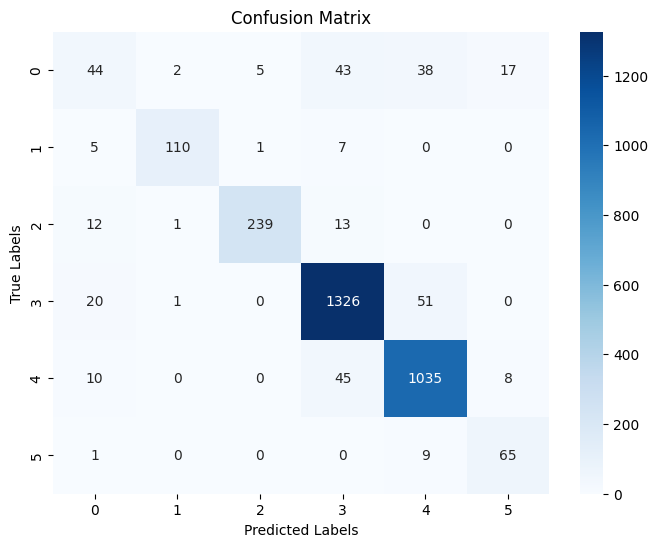

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions on the training set
y_train_pred = simple_tree_classifier.predict(X_train)

# Predictions on the test set
y_test_pred = simple_tree_classifier.predict(X_test)

# Calculate metrics for the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')

# Calculate metrics for the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Print the results
print("Metrics for the training set:")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Precision: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F1 Score: {f1_train:.2f}")

print("\nMetrics for the test set:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F1 Score: {f1_test:.2f}")


Metrics for the training set:
Accuracy: 0.94
Precision: 0.93
Recall: 0.94
F1 Score: 0.93

Metrics for the test set:
Accuracy: 0.91
Precision: 0.90
Recall: 0.91
F1 Score: 0.90


In [26]:
#random forest
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
# Assuming the last column is  target variable (y_train)
y_train = water['Quality']

# Assuming the rest of the columns are  features (X_train)
X_train = water.drop(columns=['Quality'])


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [29]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

class SimpleRandomForestClassifier:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def bootstrap_sample(self, X, y):
        indices = resample(np.arange(len(X)), replace=True)
        X_sample, y_sample = X.iloc[indices], y.iloc[indices]
        return X_sample, y_sample

    def fit(self, X, y):
        print("Starting Random Forest fitting...")
        for _ in range(self.n_estimators):
            print(f"Fitting tree {_ + 1}...")
            X_sample, y_sample = self.bootstrap_sample(X, y)
            tree = SimpleDecisionTreeClassifier()
            tree.fit(X_sample, y_sample, max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            print(f"Tree {_ + 1} fitted.")
            self.trees.append(tree)
        print("Random Forest fitting complete.")

    def predict(self, X):
        predictions = np.zeros((len(X), len(self.trees)))

        for i, tree in enumerate(self.trees):
            tree_predictions = np.array([tree.predict_obs(x, tree.tree) for _, x in X.iterrows()])
            predictions[:, i] = tree_predictions

        # Print the predictions array
        print("Predictions array:")
        print(predictions)

        # Use majority voting to get the final predictions
        final_predictions = np.apply_along_axis(lambda x: np.argmax(np.bincount(x.astype(int))), axis=1, arr=predictions)
        return final_predictions





In [30]:
# Instantiate the classifier
simple_rf_classifier = SimpleRandomForestClassifier(n_estimators=20, max_depth=10, min_samples_split=25)

In [31]:
# Fit the model on the training data
simple_rf_classifier.fit(X_train, y_train)


Starting Random Forest fitting...
Fitting tree 1...
Tree 1 fitted.
Fitting tree 2...
Tree 2 fitted.
Fitting tree 3...
Tree 3 fitted.
Fitting tree 4...
Tree 4 fitted.
Fitting tree 5...
Tree 5 fitted.
Fitting tree 6...
Tree 6 fitted.
Fitting tree 7...
Tree 7 fitted.
Fitting tree 8...
Tree 8 fitted.
Fitting tree 9...
Tree 9 fitted.
Fitting tree 10...
Tree 10 fitted.
Fitting tree 11...
Tree 11 fitted.
Fitting tree 12...
Tree 12 fitted.
Fitting tree 13...
Tree 13 fitted.
Fitting tree 14...
Tree 14 fitted.
Fitting tree 15...
Tree 15 fitted.
Fitting tree 16...
Tree 16 fitted.
Fitting tree 17...
Tree 17 fitted.
Fitting tree 18...
Tree 18 fitted.
Fitting tree 19...
Tree 19 fitted.
Fitting tree 20...
Tree 20 fitted.
Random Forest fitting complete.


In [32]:
# Make predictions on the test data
rf_predictions = simple_rf_classifier.predict(X_test)

# Evaluate the performance of the Random Forest classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')

# Display classification report
print('Random Forest Classification Report:')
print(classification_report(y_test, rf_predictions))

# Display confusion matrix
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, rf_predictions))


Predictions array:
[[0. 0. 0. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 ...
 [2. 3. 2. ... 2. 0. 2.]
 [5. 5. 5. ... 5. 4. 4.]
 [3. 3. 3. ... 3. 3. 3.]]
Random Forest Accuracy: 0.92
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.22      0.32       149
           1       0.99      0.95      0.97       123
           2       0.98      0.93      0.95       265
           3       0.93      0.97      0.95      1398
           4       0.92      0.97      0.94      1098
           5       0.84      0.87      0.86        75

    accuracy                           0.92      3108
   macro avg       0.87      0.82      0.83      3108
weighted avg       0.91      0.92      0.92      3108

Random Forest Confusion Matrix:
[[  33    1    6   51   46   12]
 [   6  117    0    0    0    0]
 [   5    0  246   14    0    0]
 [   6    0    0 1352   40    0]
 [   7    0    0   31 1060    0]
 [   0    0    0   

In [36]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import time

# Make predictions on the test data
start_time = time.time()
rf_predictions = simple_rf_classifier.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time

# Calculate R-Squared
r_squared = r2_score(y_test, rf_predictions)

# Calculate MAE
mae = mean_absolute_error(y_test, rf_predictions)

# Calculate MSE
mse = mean_squared_error(y_test, rf_predictions)

# Display results
print(f'R-Squared: {r_squared:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'Execution Time: {execution_time:.2f} seconds')

Predictions array:
[[0. 0. 0. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 ...
 [2. 3. 2. ... 2. 0. 2.]
 [5. 5. 5. ... 5. 4. 4.]
 [3. 3. 3. ... 3. 3. 3.]]
R-Squared: 0.48
MAE: 0.18
MSE: 0.58
Execution Time: 8.44 seconds


In [39]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import time

# Make predictions on the test data
start_time = time.time()
rf_decision =  simple_tree_classifier.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time

# Calculate R-Squared
r_squared = r2_score(y_test, rf_decision)

# Calculate MAE
mae = mean_absolute_error(y_test, rf_decision)

# Calculate MSE
mse = mean_squared_error(y_test, rf_decision)

# Display results
print(f'R-Squared: {r_squared:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'Execution Time: {execution_time:.2f} seconds')

R-Squared: 0.42
MAE: 0.21
MSE: 0.65
Execution Time: 0.74 seconds


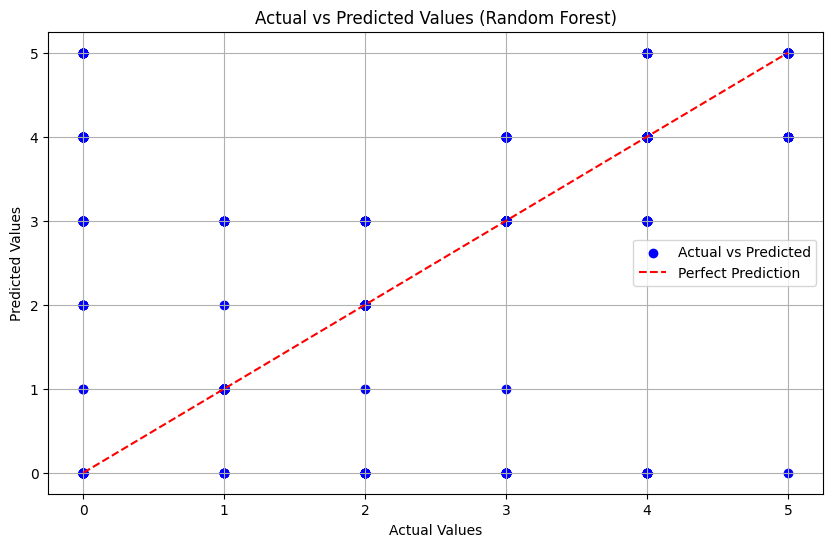

In [40]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_decision, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

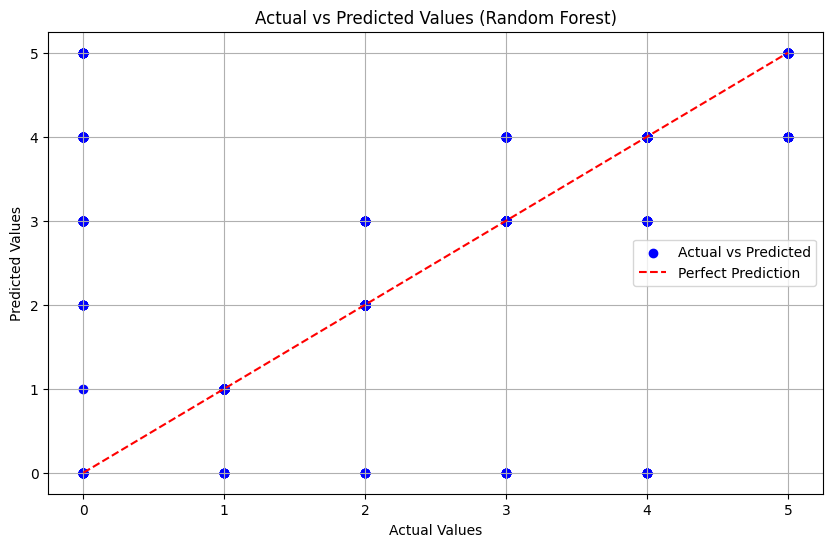

In [37]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(rf_predictions, f)

In [ ]:
import pickle
from keras.models import Sequential
from keras.models import load_model

# Step 1: Load the Pickle Model
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

# Step 2: Convert to Keras Model
keras_model = Sequential()


# Step 3: Export to HDF5(keras) Format
keras_model.save('mymodel.keras')